In [1]:
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
#importing the required libraries
import pandas as pd
import plotly.express as px
import seaborn as sns
import sklearn.metrics as metrics
import squarify
from kmodes.kprototypes import KPrototypes
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
#importing the datasets
orders = pd.read_csv('/Users/aishwaryakurnutala/Downloads/olistdata/olist_orders_dataset.csv')
customers = pd.read_csv('/Users/aishwaryakurnutala/Downloads/olistdata/olist_customers_dataset.csv')
products_translations = pd.read_csv(
    '/Users/aishwaryakurnutala/Downloads/olistdata/product_category_name_translation.csv')
products = pd.read_csv("/Users/aishwaryakurnutala/Downloads/olistdata/olist_products_dataset.csv")
orderreviews_data = pd.read_csv('/Users/aishwaryakurnutala/Downloads/olistdata/olist_order_reviews_dataset.csv')
order_items = pd.read_csv("/Users/aishwaryakurnutala/Downloads/olistdata/olist_order_items_dataset.csv")
payments = pd.read_csv('/Users/aishwaryakurnutala/Downloads/olistdata/olist_order_payments_dataset.csv')

In [3]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [4]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [5]:
orders['order_delivered_carrier_date'] = orders[['order_delivered_carrier_date']] \
    .apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y-%m-%d %H:%M:%S')) \
    .apply(lambda x: x.dt.date) \
    .astype('datetime64')

In [6]:
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0                       2017-10-04           2017-10-10 21:25:13   
1                       2018-07-26           2018-08-07 15:27:45   
2                       2018-08-08           2018-08-17 18:06:29   
3                       2017-11-22           2017-12-02 00:28:42   
4                       2018-02-14           2018-02-16 18:17:02   
...                            ...                           ...   
99436                   2017-03-10           2017-03-17 15:08:01   
99437                   2018-02-07           2018-02-28 17:37:56   
99438                   2017-08-28           2017-09-21 11:24:17   
99439                   2018-01-12           2018-01-25 23:32:54   
99440                   2018-03-09           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [7]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
orders = orders.dropna(subset=['order_delivered_carrier_date'])

In [9]:
# We'll be taking the recent day plus 1 day as the present date for the rfm analysis
recent_date = orders['order_delivered_carrier_date'].max() + timedelta(days=1)
recent_date

Timestamp('2018-09-12 00:00:00')

In [10]:
merged_data = orders.merge(payments, how='inner', on=['order_id'])

In [11]:
# form the rfm dataframe by grouping by customer id and using aggregations
rfm_df = merged_data.groupby('customer_id').agg(
    recency=('order_delivered_carrier_date', lambda x: (recent_date - x.max()).days),
    frequency=('payment_sequential', 'count'),
    monetary=('payment_value', 'sum'))

In [12]:
rfm_df.head()

recency  frequency  monetary
customer_id                                                   
00012a2ce6f8dcda20d059ce98491703      299          1    114.74
000161a058600d5901f007fab4c27140      420          1     67.41
0001fd6190edaaf884bcaf3d49edf079      560          1    195.42
0002414f95344307404f0ace7a26f1d5      389          1    179.35
000379cdec625522490c315e70c7a9fb      161          1    107.01

In [13]:
rfm_df.describe().T

count        mean         std   min     25%     50%     75%  \
recency    97657.0  250.736015  152.680372  1.00  127.00  231.00  362.00   
frequency  97657.0    1.044451    0.378738  1.00    1.00    1.00    1.00   
monetary   97657.0  159.826284  218.553900  9.59   61.93  105.28  176.26   

                max  
recency      704.00  
frequency     29.00  
monetary   13664.08

### Recency

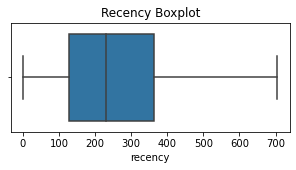

In [14]:
plt.figure(figsize=(5, 2))
sns.boxplot(x='recency', data=rfm_df)
plt.title('Recency Boxplot');

/Users/aishwaryakurnutala/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


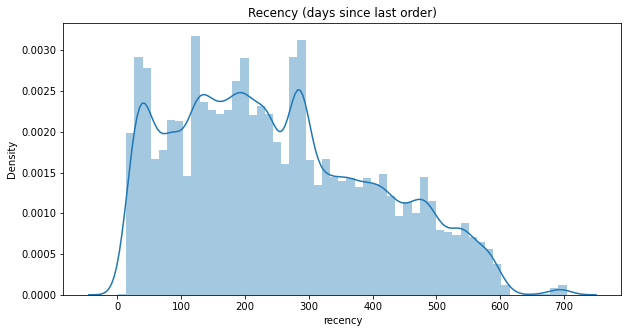

In [15]:
plt.figure(figsize=(10, 5))
plt.title('Recency (days since last order)')
sns.distplot(rfm_df.recency, bins=55);

Looking at the distributions, most of the customers have their recent orders betwen 0 to 300 days

### Frequency

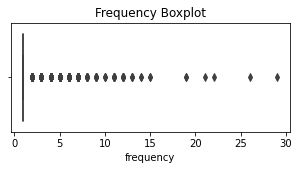

In [16]:
plt.figure(figsize=(5, 2))
sns.boxplot(x='frequency', data=rfm_df)
plt.title('Frequency Boxplot');

In [17]:
# drop outliers which are outside the interquantile range
def drop_outliers(df, column):
    quantile1 = df[column].quantile(0.05)
    quantile3 = df[column].quantile(0.95)
    iqr = quantile3 - quantile1
    low_fence = quantile1 - 1.5 * iqr
    high_fence = quantile3 + 1.5 * iqr
    outliers_index = df.loc[(df[column] < low_fence) | (df[column] > high_fence)].index
    df = pd.DataFrame(df.drop(outliers_index.to_list(), axis=0, inplace=True))
    return df

In [18]:
drop_outliers(rfm_df, 'frequency')

Empty DataFrame
Columns: []
Index: []

Text(0.5, 1.0, 'Frequency Boxplot')

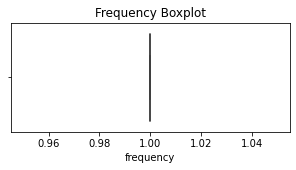

In [19]:
plt.figure(figsize=(5, 2))
sns.boxplot(x='frequency', data=rfm_df)
plt.title('Frequency Boxplot')

After dropping outliers, we are left with single value 1

In [20]:
rfm_df.shape

(94752, 3)

### Monetary

Text(0.5, 1.0, 'Monetary Boxplot')

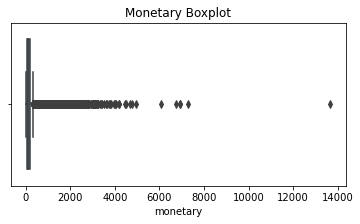

In [21]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='monetary', data=rfm_df)
plt.title('Monetary Boxplot')

In [22]:
drop_outliers(rfm_df, 'monetary')

Empty DataFrame
Columns: []
Index: []

Text(0.5, 1.0, 'Monetary Boxplot')

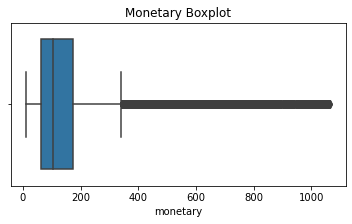

In [23]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='monetary', data=rfm_df)
plt.title('Monetary Boxplot')

The boxplot looks cleaner after dropping the outliers

/Users/aishwaryakurnutala/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


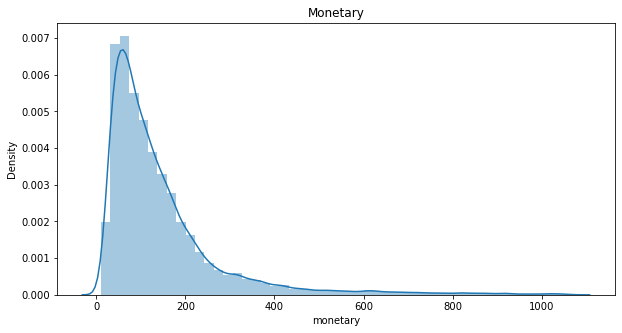

In [24]:
plt.figure(figsize=(10, 5))
plt.title('Monetary')
sns.distplot(rfm_df.monetary);

In [25]:
rfm_df.shape

(93837, 3)

### Assign Scores for each column

In [26]:
rfm_df["recency_score"] = pd.qcut(rfm_df['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df["frequency_score"] = pd.qcut(rfm_df['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df["monetary_score"] = pd.qcut(rfm_df['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [27]:
rfm_df['rfm_score'] = rfm_df.recency_score.astype(str) + rfm_df.frequency_score.astype(
    str) + rfm_df.monetary_score.astype(str)

In [28]:
rfm_df

recency  frequency  monetary recency_score  \
customer_id                                                                    
00012a2ce6f8dcda20d059ce98491703      299          1    114.74             2   
000161a058600d5901f007fab4c27140      420          1     67.41             1   
0001fd6190edaaf884bcaf3d49edf079      560          1    195.42             1   
0002414f95344307404f0ace7a26f1d5      389          1    179.35             2   
000379cdec625522490c315e70c7a9fb      161          1    107.01             4   
...                                   ...        ...       ...           ...   
fffb97495f78be80e2759335275df2aa      238          1     61.01             3   
fffcb937e9dd47a13f05ecb8290f4d3e      179          1     91.91             4   
fffeda5b6d849fbd39689bb92087f431      110          1     63.13             4   
ffff42319e9b2d713724ae527742af25       89          1    214.13             5   
ffffa3172527f765de70084a7e53aae8      369          1     45.50             2   

                                 frequency_score monetary_score rfm_score  
customer_id                                                                
00012a2ce6f8dcda20d059ce98491703               1              3       213  
000161a058600d5901f007fab4c27140               1              2       112  
0001fd6190edaaf884bcaf3d49edf079               1              4       114  
0002414f95344307404f0ace7a26f1d5               1              4       214  
000379cdec625522490c315e70c7a9fb               1              3       413  
...                                          ...            ...       ...  
fffb97495f78be80e2759335275df2aa               5              2       352  
fffcb937e9dd47a13f05ecb8290f4d3e               5              3       453  
fffeda5b6d849fbd39689bb92087f431               5              2       452  
ffff42319e9b2d713724ae527742af25               5              5       555  
ffffa3172527f765de70084a7e53aae8               5              1       251  

[93837 rows x 7 columns]

The segments mapped to the scores are obtained from bloomreach documentation - https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

In [29]:
rfm_score_mappings = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [30]:
rfm_df['segment'] = rfm_df['recency_score'].astype(str) + rfm_df['frequency_score'].astype(str) + rfm_df[
    'monetary_score'].astype(str)
rfm_df['segment'] = rfm_df['segment'].replace(rfm_score_mappings, regex=True)
rfm_df.head()

recency  frequency  monetary recency_score  \
customer_id                                                                    
00012a2ce6f8dcda20d059ce98491703      299          1    114.74             2   
000161a058600d5901f007fab4c27140      420          1     67.41             1   
0001fd6190edaaf884bcaf3d49edf079      560          1    195.42             1   
0002414f95344307404f0ace7a26f1d5      389          1    179.35             2   
000379cdec625522490c315e70c7a9fb      161          1    107.01             4   

                                 frequency_score monetary_score rfm_score  \
customer_id                                                                 
00012a2ce6f8dcda20d059ce98491703               1              3       213   
000161a058600d5901f007fab4c27140               1              2       112   
0001fd6190edaaf884bcaf3d49edf079               1              4       114   
0002414f95344307404f0ace7a26f1d5               1              4       214   
000379cdec625522490c315e70c7a9fb               1              3       413   

                                           segment  
customer_id                                         
00012a2ce6f8dcda20d059ce98491703    About To Sleep  
000161a058600d5901f007fab4c27140    Lost customers  
0001fd6190edaaf884bcaf3d49edf079  Cannot Lose Them  
0002414f95344307404f0ace7a26f1d5  Cannot Lose Them  
000379cdec625522490c315e70c7a9fb         Promising

In [31]:
rfm_df['segment'].value_counts()

Potential Loyalist       17613
At Risk                  16487
Promising                12121
Hibernating customers     8366
Need Attention            6213
Loyal                     6058
About To Sleep            5962
Cannot Lose Them          5744
Champions                 5376
New Customers             5222
Lost customers            4675
Name: segment, dtype: int64

Text(0, 0.5, 'Customer Count')

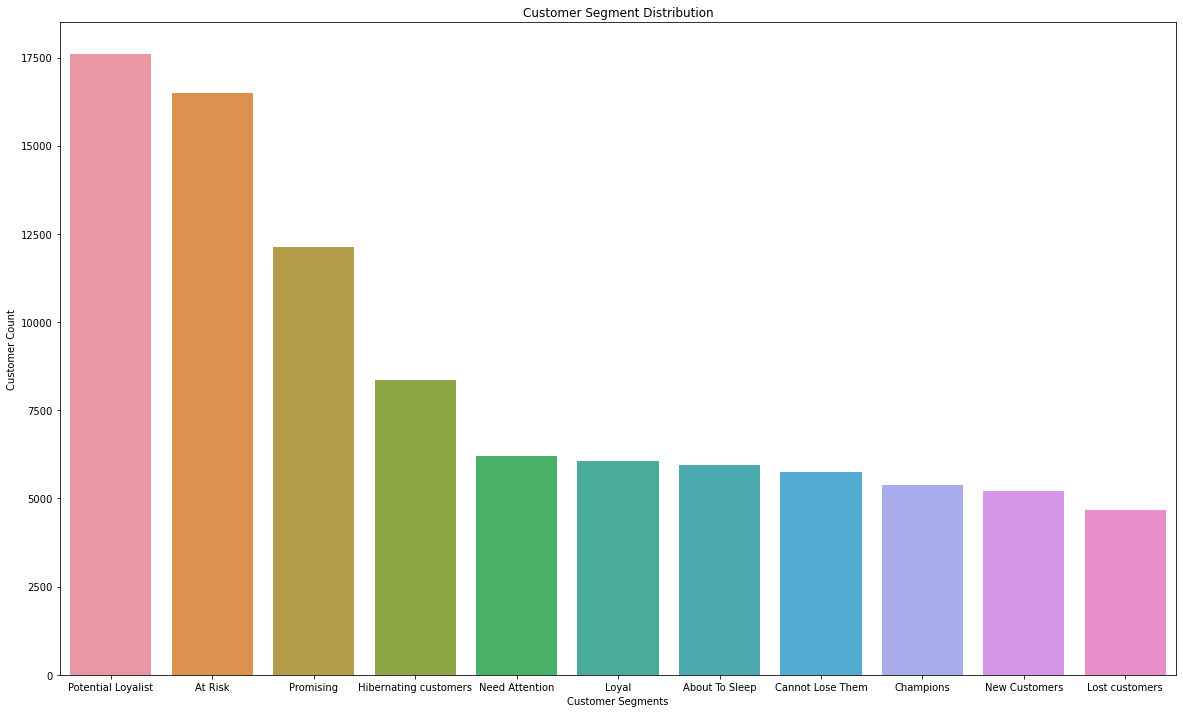

In [32]:
#visualizing the segments in the data
plt.figure(figsize=(20, 12))
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segments')
sns.barplot(x=rfm_df.segment.value_counts().index, y=rfm_df.segment.value_counts())
plt.ylabel('Customer Count')

#### The following table gives the customer segment description and suggested future action to effectively engage them

|Segment|	Activity|	Actionable Tip|
| --- | --- | --- |
Champions|	Bought recently, order often and spend the most.|	Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.|
Loyal|	Orders regularly. Responsive to promotions.|	Upsell higher value products. Ask for reviews.|
Potential Loyalists|	Recent customers who spent good amounts.	|Offer membership / loyalty program. Keep them engaged. Offer personalized recommendations.|
New Customers|	Bought most recently.	|Provide on-boarding support, give them early access, start building relationship.|
Promising|	Potential loyalist a few months ago. Spends frequently and a good amount. But the last purchase was several weeks ago.	|Offer coupons. Bring them back to the platform and keep them engaged. Offer personalized recommendations.|
Need attention|	Core customers whose last purchase happened more than one month ago.	|Make limited time offers. Offer personalized recommendations.|
About to sleep|	Made their last purchase a long time ago but in the last 4 weeks either visited the site or opened an email.	|Make subject lines of emails very personalized. Revive their interest by a specific discount on a specific product.|
Cannot Lose Them|	Made the largest orders, and often. But haven’t returned for a long time.	|Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalization.|
At Risk| Similar to 'Cannot Lose Them' but with smaller monetary and frequency value.	|Provide helpful resources on the site. Send personalized emails.|
Hibernating customers|	Customers who made smaller and infrequent purchases before but haven't purchased anything in a long time.	|Include them in your standard email communication but regularly check if they don't flag your content as spam. Do not overspend on this segment.|
Lost|	Made last purchase long time ago and didn’t engage at all in the last 4 weeks.|	Revive interest with reach out campaign. Ignore otherwise.|

In [33]:
rfm_df1 = rfm_df[['recency', 'frequency', 'monetary', 'rfm_score']]
rfm_df1

recency  frequency  monetary rfm_score
customer_id                                                             
00012a2ce6f8dcda20d059ce98491703      299          1    114.74       213
000161a058600d5901f007fab4c27140      420          1     67.41       112
0001fd6190edaaf884bcaf3d49edf079      560          1    195.42       114
0002414f95344307404f0ace7a26f1d5      389          1    179.35       214
000379cdec625522490c315e70c7a9fb      161          1    107.01       413
...                                   ...        ...       ...       ...
fffb97495f78be80e2759335275df2aa      238          1     61.01       352
fffcb937e9dd47a13f05ecb8290f4d3e      179          1     91.91       453
fffeda5b6d849fbd39689bb92087f431      110          1     63.13       452
ffff42319e9b2d713724ae527742af25       89          1    214.13       555
ffffa3172527f765de70084a7e53aae8      369          1     45.50       251

[93837 rows x 4 columns]

# Clustering with K-Prototype

In [34]:
#merging the data to get the categorical variables
df = rfm_df1.merge(orders, how='inner', on=['customer_id'])
df = df.merge(customers, how="inner", on=["customer_id"])
df = df.merge(order_items, how="inner", on=["order_id"])
df = df.merge(payments, how="inner", on=["order_id"])
df = df.merge(orderreviews_data, how="inner", on=["order_id"])
df = df.merge(products, how="inner", on=["product_id"])
df = df.merge(products_translations, how="inner", on=["product_category_name"])

df.head()

customer_id  recency  frequency  monetary rfm_score  \
0  00012a2ce6f8dcda20d059ce98491703      299          1    114.74       213   
1  13d6935a154e88a19cec61280ff67217      373          1    109.70       213   
2  279375c3290f45664fb0b20cde471987      328          1    107.80       213   
3  2b685398c61b72f24fce6c289aa1d810       77          1     98.29       513   
4  323a3f2d3b2d3413da554ffd9e722d5d      386          1    291.47       215   

                           order_id order_status order_purchase_timestamp  \
0  5f79b5b0931d63f1a42989eb65b9da6e    delivered      2017-11-14 16:08:26   
1  12d9723638a09350ec19ea8d66073249    delivered      2017-09-01 20:05:31   
2  cca53f6baff9286b728cc328ca7a2d37    delivered      2017-10-16 19:01:58   
3  d266e87fb98640ecbbe91425c76e72f3    delivered      2018-06-26 18:03:15   
4  62f7289ebfb6bb8bcf133442c92558d4    delivered      2017-08-21 17:17:20   

     order_approved_at order_delivered_carrier_date  ...  \
0  2017-11-14 16:35:32                   2017-11-17  ...   
1  2017-09-01 22:25:46                   2017-09-04  ...   
2  2017-10-16 19:40:08                   2017-10-19  ...   
3  2018-06-26 18:18:44                   2018-06-27  ...   
4  2017-08-21 17:31:35                   2017-08-22  ...   

  review_answer_timestamp product_category_name product_name_lenght  \
0     2017-12-04 12:00:07            brinquedos                55.0   
1     2017-09-13 02:13:46            brinquedos                55.0   
2     2017-11-01 18:17:18            brinquedos                55.0   
3     2018-07-24 14:20:39            brinquedos                55.0   
4     2017-08-26 21:07:14            brinquedos                55.0   

   product_description_lenght product_photos_qty product_weight_g  \
0                       889.0                1.0           4267.0   
1                       889.0                1.0           4267.0   
2                       889.0                1.0           4267.0   
3                       889.0                1.0           4267.0   
4                       889.0                1.0           4267.0   

   product_length_cm product_height_cm product_width_cm  \
0               46.0              39.0             22.0   
1               46.0              39.0             22.0   
2               46.0              39.0             22.0   
3               46.0              39.0             22.0   
4               46.0              39.0             22.0   

  product_category_name_english  
0                          toys  
1                          toys  
2                          toys  
3                          toys  
4                          toys  

[5 rows x 41 columns]

In [35]:
#considering only 2 categorical variables and r,f,m values
df_train = df[["customer_city", "customer_zip_code_prefix", "recency", "frequency", "monetary"]]
df_train.head()

customer_city  customer_zip_code_prefix  recency  frequency  \
0                 osasco                      6273      299          1   
1  sao jose do rio preto                     15055      373          1   
2         rio de janeiro                     22620      328          1   
3               contagem                     32185       77          1   
4              sao paulo                      5618      386          1   

   monetary  
0    114.74  
1    109.70  
2    107.80  
3     98.29  
4    291.47

In [36]:
df_train.dtypes

customer_city                object
customer_zip_code_prefix      int64
recency                       int64
frequency                     int64
monetary                    float64
dtype: object

In [37]:
#converting categorical features to string and numerical features to float data type.
df_train["customer_zip_code_prefix"] = df_train["customer_zip_code_prefix"].astype(str)
df_train["recency"] = df_train["recency"].astype(float)
df_train["frequency"] = df_train["frequency"].astype(float)
df_train.dtypes

/var/folders/y6/jh7y7gn9313fm547zj463pg40000gn/T/ipykernel_1704/2753422343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["customer_zip_code_prefix"]=df_train["customer_zip_code_prefix"].astype(str)
/var/folders/y6/jh7y7gn9313fm547zj463pg40000gn/T/ipykernel_1704/2753422343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["recency"]=df_train["recency"].astype(float)
/var/folders/y6/jh7y7gn9313fm547zj463pg40000gn/T/ipykernel_1704/2753422343.py:3: SettingWithCopyWarning: 
A value is t

customer_city                object
customer_zip_code_prefix     object
recency                     float64
frequency                   float64
monetary                    float64
dtype: object

In [38]:
rfm = df_train.copy()
#Applying log transformation as frequency and monetary columns are skewed
rfm['frequency'] = np.log10(rfm['frequency'])
rfm['monetary'] = np.log10(rfm['monetary'])
rfm.head()


customer_city customer_zip_code_prefix  recency  frequency  \
0                 osasco                     6273    299.0        0.0   
1  sao jose do rio preto                    15055    373.0        0.0   
2         rio de janeiro                    22620    328.0        0.0   
3               contagem                    32185     77.0        0.0   
4              sao paulo                     5618    386.0        0.0   

   monetary  
0  2.059715  
1  2.040207  
2  2.032619  
3  1.992509  
4  2.464594

In [39]:
#Using MinmaxScaler to scale only the numerical features
scaler = MinMaxScaler()
cols = rfm.select_dtypes(exclude='object').columns
rfm[cols] = scaler.fit_transform(rfm[cols])
rfm.head()

customer_city customer_zip_code_prefix   recency  frequency  \
0                 osasco                     6273  0.423898        0.0   
1  sao jose do rio preto                    15055  0.529161        0.0   
2         rio de janeiro                    22620  0.465149        0.0   
3               contagem                    32185  0.108108        0.0   
4              sao paulo                     5618  0.547653        0.0   

   monetary  
0  0.521882  
1  0.512247  
2  0.508499  
3  0.488690  
4  0.721846

In [40]:
#converting the data to an array
RFM_Scaled = rfm.to_numpy()

In [41]:
RFM_Scaled

array([['osasco', '6273', 0.4238975817923186, 0.0, 0.5218817070605513],
       ['sao jose do rio preto', '15055', 0.5291607396870556, 0.0,
        0.5122468788158099],
       ['rio de janeiro', '22620', 0.465149359886202, 0.0,
        0.508499340586759],
       ...,
       ['sao paulo', '2855', 0.20910384068278806, 0.0,
        0.34673938006257987],
       ['rolim de moura', '76940', 0.8421052631578948, 0.0,
        0.6505666171946629],
       ['brasilia', '71940', 0.507823613086771, 0.0, 0.5232048719177465]],
      dtype=object)

In [42]:
% % time
#calculating the cost function of k-prototype model for k=(2,6)
cost = []
for x in range(2, 6):
    kproto = KPrototypes(n_clusters=x, verbose=2, max_iter=20, n_jobs=-1)
    clusters = kproto.fit_predict(RFM_Scaled, categorical=[0, 1])
    cost.append(kproto.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 4, iteration: 1/20, moves: 2810, ncost: 18382.740983013213
Run: 3, iteration: 1/20, moves: 17405, ncost: 17020.375371657632
Run: 2, iteration: 1/20, moves: 20414, ncost: 16989.988734040606
Run: 7, iteration: 1/20, moves: 17259, ncost: 17141.65373302312
Run: 1, iteration: 1/20, m

In [43]:
df_cost = pd.DataFrame()
df_cost['clusters'] = range(2, 6)
df_cost['cost'] = cost

<AxesSubplot:xlabel='clusters', ylabel='cost'>

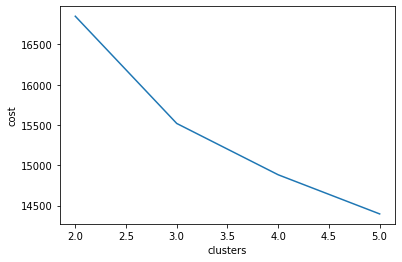

In [45]:

sns.lineplot(data=df_cost, x='clusters', y='cost')

Here the k value observed is 4 from the elbow graph.

In [46]:
#k-prototype model with 4 clusters
kprototype = KPrototypes(n_clusters=4, verbose=0, random_state=42, max_iter=20, n_jobs=-2, gamma=.25)
Clusters = kprototype.fit_predict(RFM_Scaled, categorical=[0, 1])

In [47]:
#printing cluster centroids
print(kprototype.cluster_centroids_)

[['0.64604794026711' '0.0' '0.4317360147056517' 'sao paulo' '22790']
 ['0.24095275003208202' '0.0' '0.3792238840615851' 'sao paulo' '24220']
 ['0.48536272463008906' '0.0' '0.6702305831090662' 'sao paulo' '22793']
 ['0.165029009027181' '0.0' '0.6456600582309816' 'sao paulo' '24230']]


In [48]:
#cluster labels
clusters_df = []
for c in Clusters:
    clusters_df.append(c)

In [49]:
clusters_df

[2,
 0,
 2,
 3,
 2,
 0,
 3,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 3,
 2,
 2,
 0,
 3,
 2,
 0,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 3,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,


In [50]:
#Assigning the cluster labels to the data
df['cluster'] = clusters_df
df

customer_id  recency  frequency  monetary  \
0       00012a2ce6f8dcda20d059ce98491703      299          1    114.74   
1       13d6935a154e88a19cec61280ff67217      373          1    109.70   
2       279375c3290f45664fb0b20cde471987      328          1    107.80   
3       2b685398c61b72f24fce6c289aa1d810       77          1     98.29   
4       323a3f2d3b2d3413da554ffd9e722d5d      386          1    291.47   
...                                  ...      ...        ...       ...   
105044  87af82b8a09271d8cb7596bb9e8fca5e       55          1     49.92   
105045  d8b65951c84554c80270720c9b5f1178      131          1     56.15   
105046  e10c1bdd9c0adfab0a2f88a2780406a1      148          1     50.71   
105047  363d3a9b2ec5c5426608688ca033292d      593          1    209.06   
105048  919570a26efbd068d6a0f66d5c5072a3      358          1    115.45   

       rfm_score                          order_id order_status  \
0            213  5f79b5b0931d63f1a42989eb65b9da6e    delivered   
1            213  12d9723638a09350ec19ea8d66073249    delivered   
2            213  cca53f6baff9286b728cc328ca7a2d37    delivered   
3            513  d266e87fb98640ecbbe91425c76e72f3    delivered   
4            215  62f7289ebfb6bb8bcf133442c92558d4    delivered   
...          ...                               ...          ...   
105044       531  51bfdb83aacf1064814782f7109c6365    delivered   
105045       452  6bcce39be127575854779e39a50f2059    delivered   
105046       451  92d14247bec036e6b052ba1331bd2add    delivered   
105047       125  2c4ada2e75c2ad41dd93cebb5df5f023    delivered   
105048       233  bede3503afed051733eeb4a84d1adcc5    delivered   

       order_purchase_timestamp    order_approved_at  \
0           2017-11-14 16:08:26  2017-11-14 16:35:32   
1           2017-09-01 20:05:31  2017-09-01 22:25:46   
2           2017-10-16 19:01:58  2017-10-16 19:40:08   
3           2018-06-26 18:03:15  2018-06-26 18:18:44   
4           2017-08-21 17:17:20  2017-08-21 17:31:35   
...                         ...                  ...   
105044      2018-07-17 11:46:28  2018-07-18 02:35:17   
105045      2018-04-28 02:23:24  2018-05-01 05:32:22   
105046      2018-04-11 23:22:53  2018-04-13 12:50:23   
105047      2017-01-26 11:09:00  2017-01-26 11:22:17   
105048      2017-09-17 16:51:43  2017-09-19 04:05:52   

       order_delivered_carrier_date  ... product_category_name  \
0                        2017-11-17  ...            brinquedos   
1                        2017-09-04  ...            brinquedos   
2                        2017-10-19  ...            brinquedos   
3                        2018-06-27  ...            brinquedos   
4                        2017-08-22  ...            brinquedos   
...                             ...  ...                   ...   
105044                   2018-07-19  ...       fraldas_higiene   
105045                   2018-05-04  ...       fraldas_higiene   
105046                   2018-04-17  ...       fraldas_higiene   
105047                   2017-01-27  ...    seguros_e_servicos   
105048                   2017-09-19  ...    seguros_e_servicos   

       product_name_lenght product_description_lenght  product_photos_qty  \
0                     55.0                      889.0                 1.0   
1                     55.0                      889.0                 1.0   
2                     55.0                      889.0                 1.0   
3                     55.0                      889.0                 1.0   
4                     55.0                      889.0                 1.0   
...                    ...                        ...                 ...   
105044                49.0                      317.0                 1.0   
105045                17.0                      546.0                 1.0   
105046                49.0                      326.0                 1.0   
105047                55.0                      506.0                 1.0   
105048                

In [51]:
#mapping the segments to the rfm score in the data
df['segment'] = df['rfm_score'].replace(rfm_score_mappings, regex=True)

In [52]:
#Cluster 0
c0 = df[df['cluster'] == 0]

In [53]:
#displaying segemnts in cluster 0
c0['segment'].value_counts()

At Risk                  7186
Hibernating customers    4934
Lost customers           4661
Cannot Lose Them         2766
About To Sleep           1717
Potential Loyalist         17
Loyal                      11
Promising                   9
Need Attention              8
New Customers               4
Champions                   3
Name: segment, dtype: int64

In [54]:
#Cluster 1
c1 = df[df['cluster'] == 1]

In [55]:
#displaying segemnts in cluster 1
c1['segment'].value_counts()

Potential Loyalist       15912
New Customers             5325
About To Sleep            3881
Promising                 3210
Hibernating customers     3013
Need Attention            1300
At Risk                    875
Loyal                      198
Champions                   10
Cannot Lose Them             7
Lost customers               1
Name: segment, dtype: int64

In [56]:
#cluster 2
c2 = df[df['cluster'] == 2]

In [57]:
#displaying segemnts in cluster 2
c2['segment'].value_counts()

At Risk                  11290
Cannot Lose Them          4113
Loyal                     2376
Need Attention            1370
Promising                 1039
Hibernating customers      881
About To Sleep             449
Potential Loyalist         264
Champions                   16
New Customers                5
Lost customers               5
Name: segment, dtype: int64

In [58]:
#cluster 3
c3 = df[df['cluster'] == 3]

In [59]:
#displaying segemnts in cluster 3
c3['segment'].value_counts()

Promising                10006
Champions                 6660
Loyal                     4792
Need Attention            4416
Potential Loyalist        2281
At Risk                     13
About To Sleep               9
Cannot Lose Them             7
Hibernating customers        5
New Customers                4
Name: segment, dtype: int64

In [60]:
#group by cluster to get the mean,median, min and max of Recency, frequency and monetary parameters
temp_df = df.groupby(['cluster']).agg({
    'recency': ['mean', 'median', 'min', 'max'],
    'frequency': ['mean', 'median', 'min', 'max'],
    'monetary': ['mean', 'median', 'min', 'max', 'count']
}).round(0)

In [61]:
Cluster_stats = pd.DataFrame(temp_df)

Text(0.5, 0.98, 'Customer Segments')

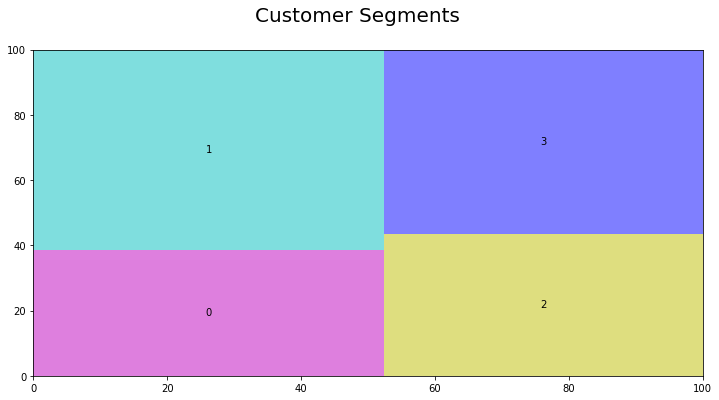

In [71]:
#visualizing the clusters
plt.figure(figsize=(12, 6))
squarify.plot(label=Cluster_stats.index, sizes=Cluster_stats["monetary"]["count"], alpha=0.5,
              color=["m", "c", "y", "b"])
plt.suptitle("Customer Segments", fontsize=20)

In [72]:
#Visualizing the clusters in 3D plot
px.scatter_3d(df, x='recency', y='frequency', z='monetary', color='cluster')

In [73]:
#label encoding the segemnts
label_encoder = preprocessing.LabelEncoder()
df['segment'] = label_encoder.fit_transform(df['segment'])
df['segment'].unique()

array([ 0, 10,  2,  4,  9,  7,  1,  6,  5,  8,  3])

In [74]:
#assigning the segment values to true labels 
labels_true = df['segment'].values

In [75]:
labels_true

array([0, 0, 0, ..., 9, 1, 4])

In [76]:
#assigning the k-prototype labels to labels
labels = kprototype.labels_
labels

array([2, 0, 2, ..., 1, 0, 2], dtype=uint16)

In [77]:
#label encoding the data for evaluation
df_final = pd.DataFrame(RFM_Scaled)
df_final[0] = label_encoder.fit_transform(df_final[0])
df_final

0      1         2    3         4
0       2542   6273  0.423898  0.0  0.521882
1       3478  15055  0.529161  0.0  0.512247
2       3092  22620  0.465149  0.0  0.508499
3       1019  32185  0.108108  0.0   0.48869
4       3523   5618  0.547653  0.0  0.721846
...      ...    ...       ...  ...       ...
105044   566  14340  0.076814  0.0  0.343372
105045  1972  13201  0.184922  0.0  0.368597
105046  3523   2855  0.209104  0.0  0.346739
105047  3136  76940  0.842105  0.0  0.650567
105048   548  71940  0.507824  0.0  0.523205

[105049 rows x 5 columns]

In [78]:
#Displaying the Evaluation metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))

Homogeneity: 0.325
Completeness: 0.540
V-measure: 0.406
Adjusted Rand Index: 0.253
Adjusted Mutual Information: 0.406


In [79]:
#Displaying the Evaluation metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_final, labels))
print("calinski harabasz score: %0.3f" % metrics.calinski_harabasz_score(df_final, labels))

Silhouette Coefficient: -0.036
calinski harabasz score: 214.076
